In [1]:
# Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from IPython.display import Image

In [2]:
# loading the data
df = pd.read_csv("https://raw.githubusercontent.com/yashXmehra/Data-Analytics/main/traindata.csv")

In [3]:
# looking the data from the top 5 rows.
df.head()

,id,gap_convdate_appcreated,days_active_app,utm_source,device_model,Android_app_version,device_price_cat,grade,current_streak,max_streak,...,comp_news,comp_reading,submitq_attempt,submitq_accuracy,total_navigations,total_visit,freados_earned,user_category,conversion_outcome1,conversion_outcome2
0,00007502-f1f1-456b-8313-68339080de0c,479,17,Organic,AC2001,5.7.0.4,High,Grade 3,0,11,...,0,0,0,0.000000,0,0,0,NaN,0,0
1,0002d2d0-d29b-4108-9c3e-da3f8552a656,1,3,Club1BR,V2036,5.7.0.1,Medium,Grade 3,0,0,...,0,0,0,0.000000,8,0,0,749106,0,0
2,0003086f-878e-49ba-86a5-af70f46c3c48,47,13,Club1BR,SM-J610F,5.7.0.3,Medium,Grade 4,0,0,...,0,0,18,0.388889,11,0,11850,yapezc,1,0
3,0003a61a-1261-423b-8eed-7e69bd4ca911,44,34,Club1BR,LENOVO YT-X705X,5.7.1.6,High,Grade 2,0,0,...,2,0,13,0.230769,18,2,1950,vloixr,0,0
4,0003ef03-ea37-449f-8334-324167930c30,36,3,Paid,1902,5.7.0.0,Medium,Grade 6,0,1,...,0,0,0,0.000000,0,0,0,NaN,0,0


In [4]:
# To know the number of rows and columns of the dataset
df.shape

(58466, 22)

In [5]:
# Removing the duplicate values
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape

(53279, 22)

After removing the duplicates, the shape of the data reduces by 5,187 rows.

In [6]:
# Checking if there are any missing values in each attribute and finding their data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53279 entries, 0 to 58465
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       53279 non-null  object 
 1   gap_convdate_appcreated  53279 non-null  int64  
 2   days_active_app          53279 non-null  int64  
 3   utm_source               53279 non-null  object 
 4   device_model             53279 non-null  object 
 5   Android_app_version      53279 non-null  object 
 6   device_price_cat         53279 non-null  object 
 7   grade                    53279 non-null  object 
 8   current_streak           53279 non-null  int64  
 9   max_streak               53279 non-null  int64  
 10  total_timespent_last7D   53279 non-null  float64
 11  comp_activity            53279 non-null  int64  
 12  comp_news                53279 non-null  int64  
 13  comp_reading             53279 non-null  int64  
 14  submitq_attempt       

1) There are 31934 missing values in the data set, more than half the no of total entries. So, remove the column itself.

2) total_timespent_last7D and submitq_accuracy are the continuous attributes.

In [7]:
df.drop(['user_category','id','utm_source','device_model','Android_app_version','device_price_cat','grade'], axis = 1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53279 entries, 0 to 58465
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gap_convdate_appcreated  53279 non-null  int64  
 1   days_active_app          53279 non-null  int64  
 2   current_streak           53279 non-null  int64  
 3   max_streak               53279 non-null  int64  
 4   total_timespent_last7D   53279 non-null  float64
 5   comp_activity            53279 non-null  int64  
 6   comp_news                53279 non-null  int64  
 7   comp_reading             53279 non-null  int64  
 8   submitq_attempt          53279 non-null  int64  
 9   submitq_accuracy         53279 non-null  float64
 10  total_navigations        53279 non-null  int64  
 11  total_visit              53279 non-null  int64  
 12  freados_earned           53279 non-null  int64  
 13  conversion_outcome1      53279 non-null  int64  
 14  conversion_outcome2   

In [9]:
# Remove object type variable.

### Heatmap

<AxesSubplot:>

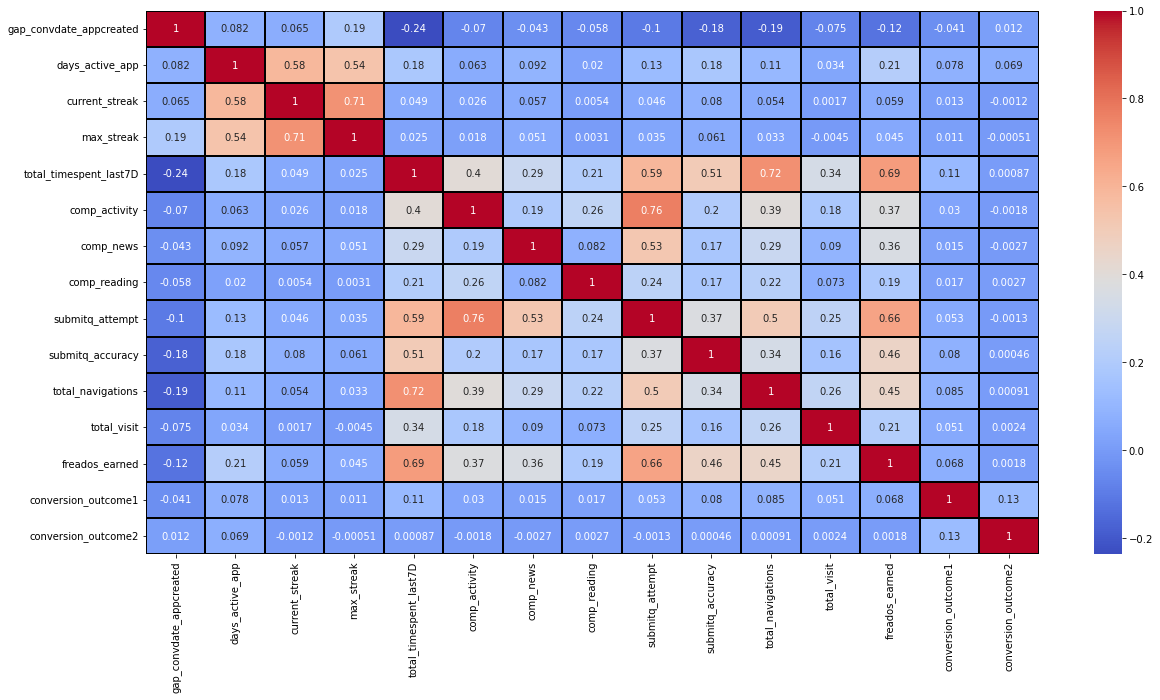

In [10]:
# Correlation matrix using standard pearson correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method="pearson"), annot = True, cmap ="coolwarm", linewidths=2, linecolor='black')

Removing the variables with high correlation to avoid the problem of multicollinearity. Here, we set the benchmark correlation at 0.70. So, we remove max_streak, total_navigations, comp_activity.

In [11]:
df.drop(['max_streak','total_navigations','comp_activity'], axis = 1, inplace=True)

### Descriptive summary statistics

<AxesSubplot:>

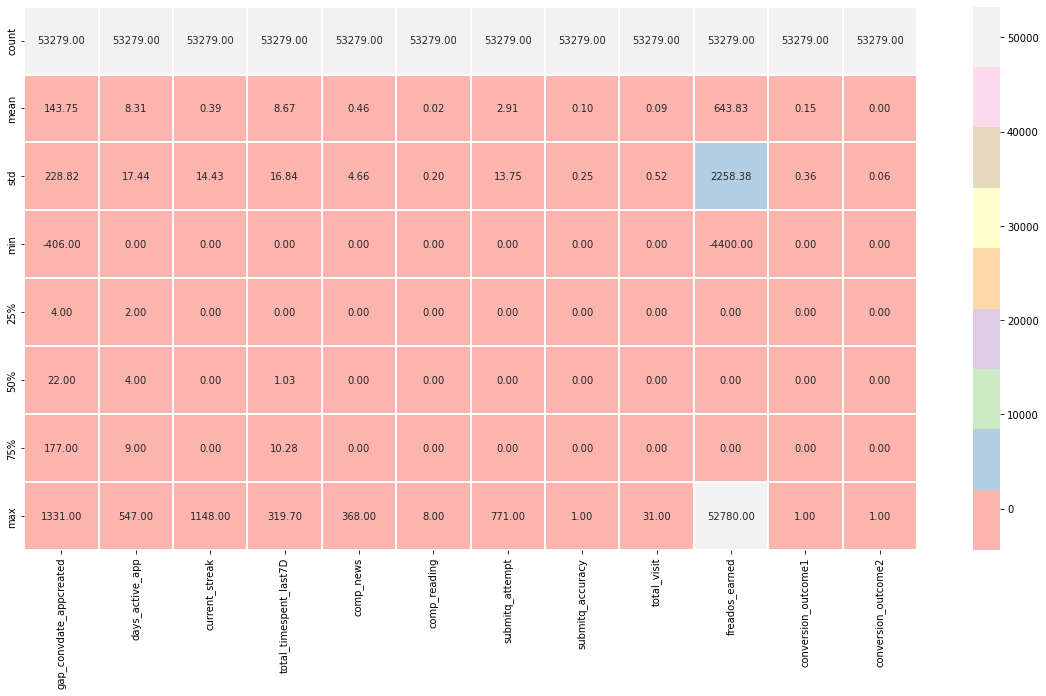

In [12]:
# Descriptive summary statistics
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), fmt = ".2f", cmap = "Pastel1",annot = True, linewidths=2, linecolor='white')

Observations

1. Outlier analysis and removal of negative values is required as days cant be negative. So, negative values of gap_convdate_appcreated are removed.

2. We observe that normalization is required in freados_earned as there is a large difference between mean value of each attribute.

In [13]:
# Removing negative values in the 'gap_convdate_appcreated' attribute
df = df[df.gap_convdate_appcreated>0]
print("Number of rows and columns after removing negative values :",df.shape)

Number of rows and columns after removing negative values : (53060, 12)


<AxesSubplot:>

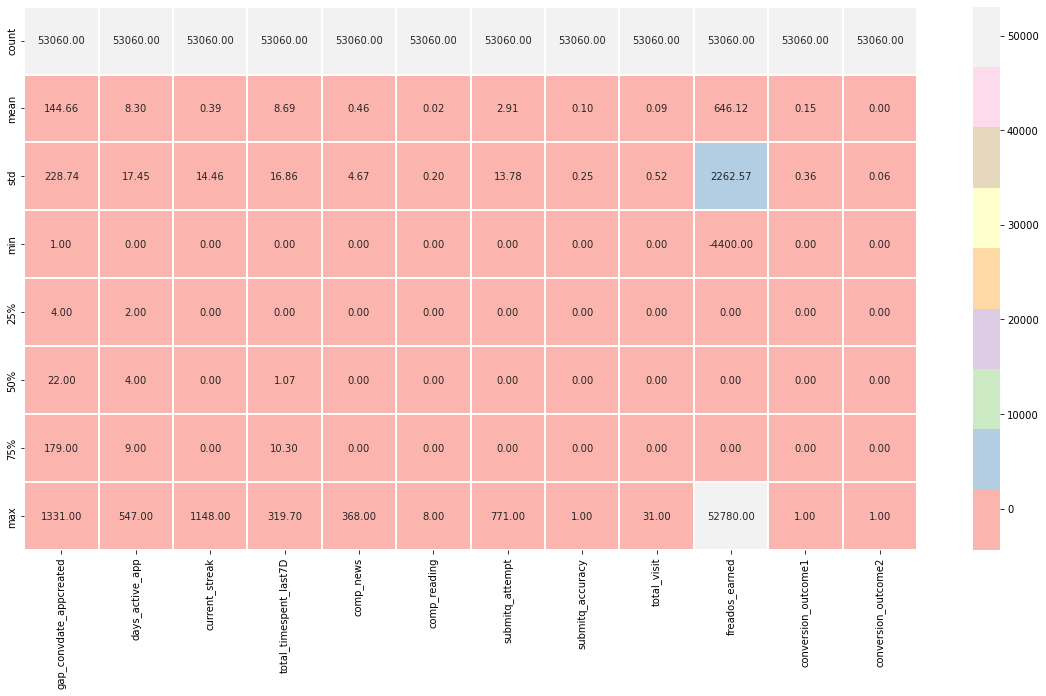

In [14]:
# Descriptive summary statistics
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), fmt = ".2f", cmap = "Pastel1",annot = True, linewidths=2, linecolor='white')

### Outlier Analysis

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


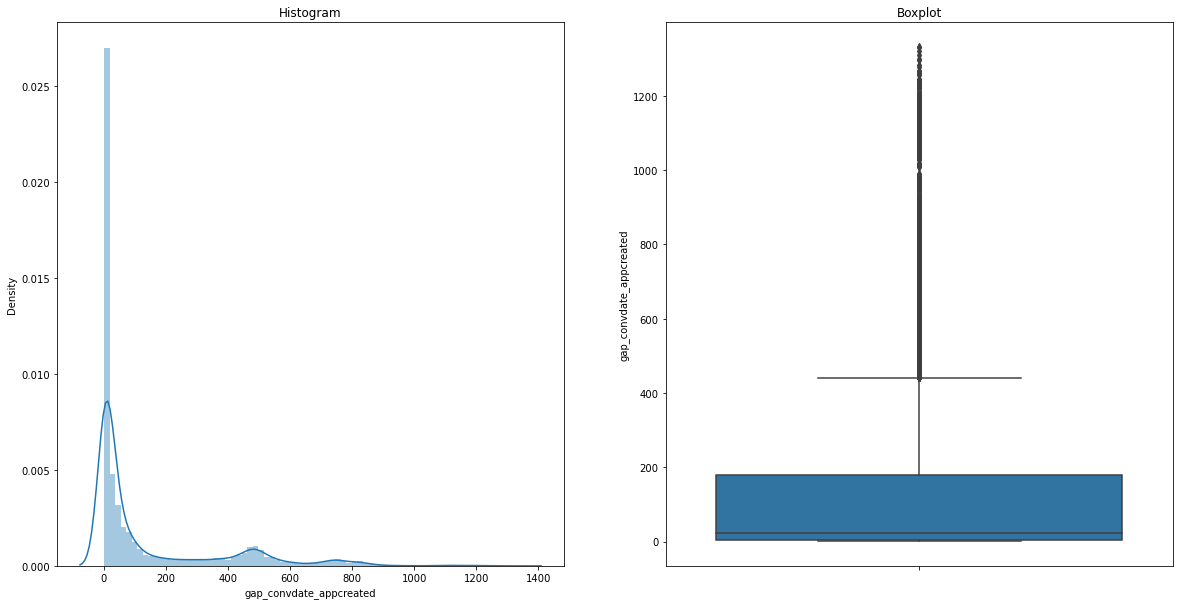

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


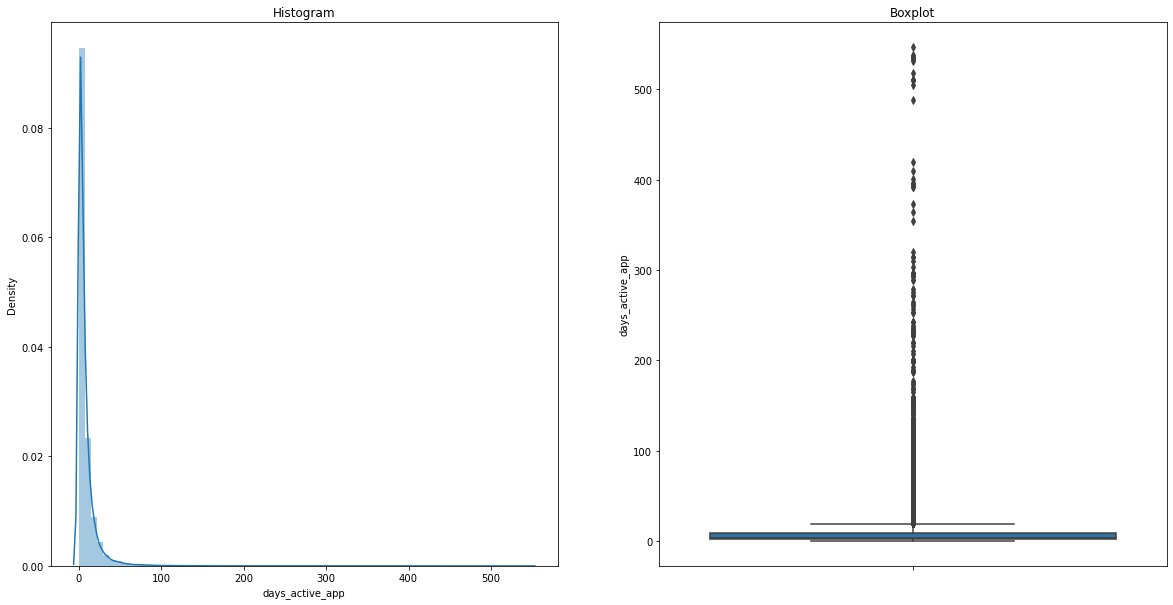

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


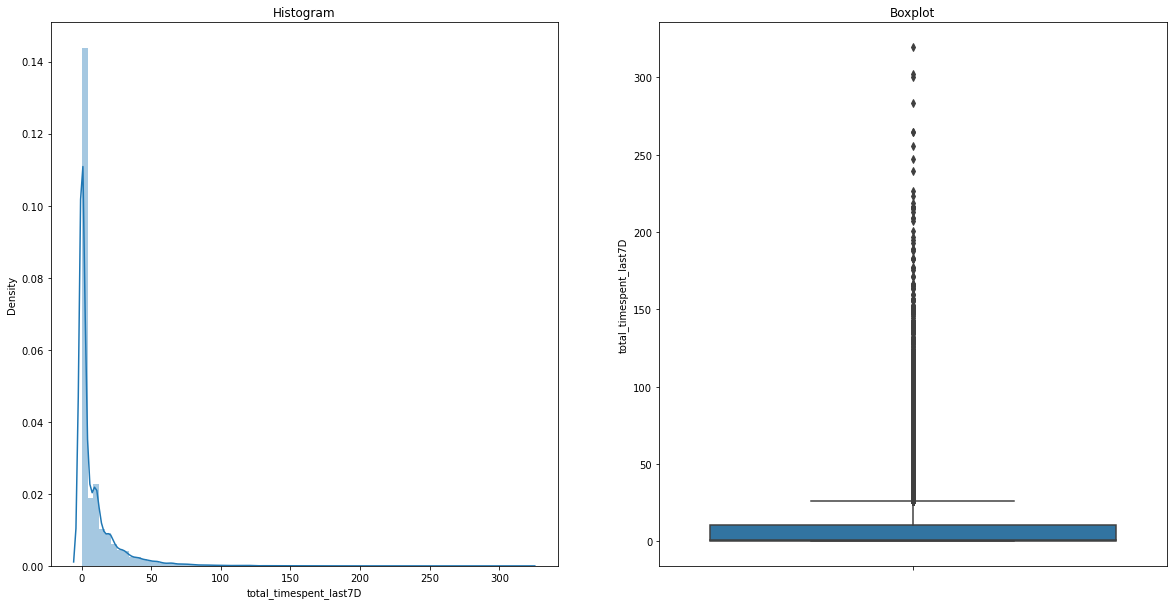

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


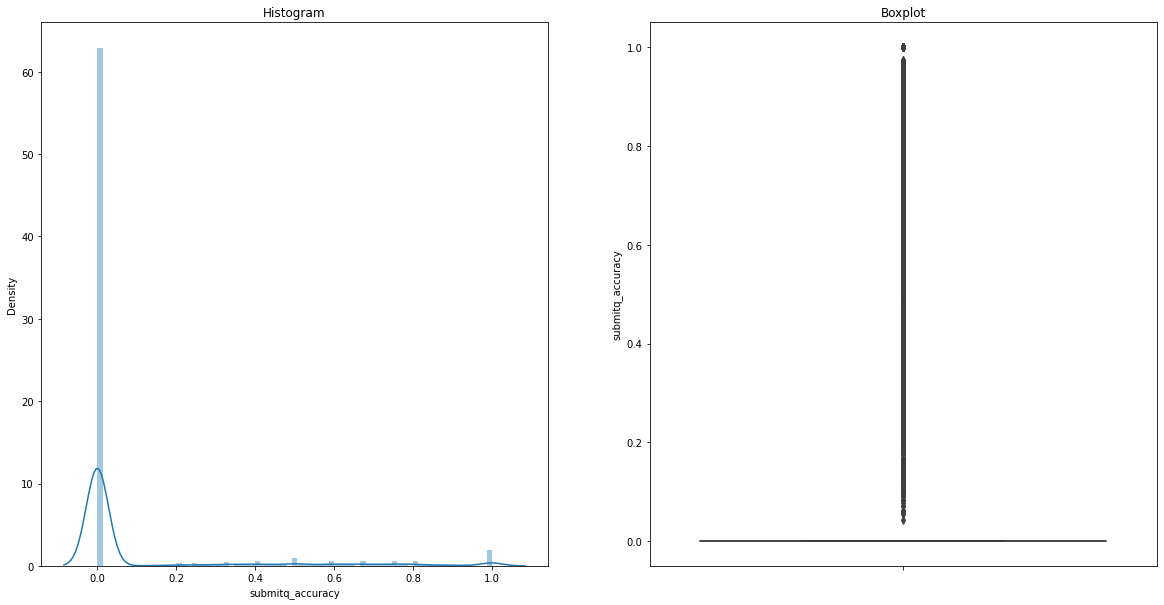

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


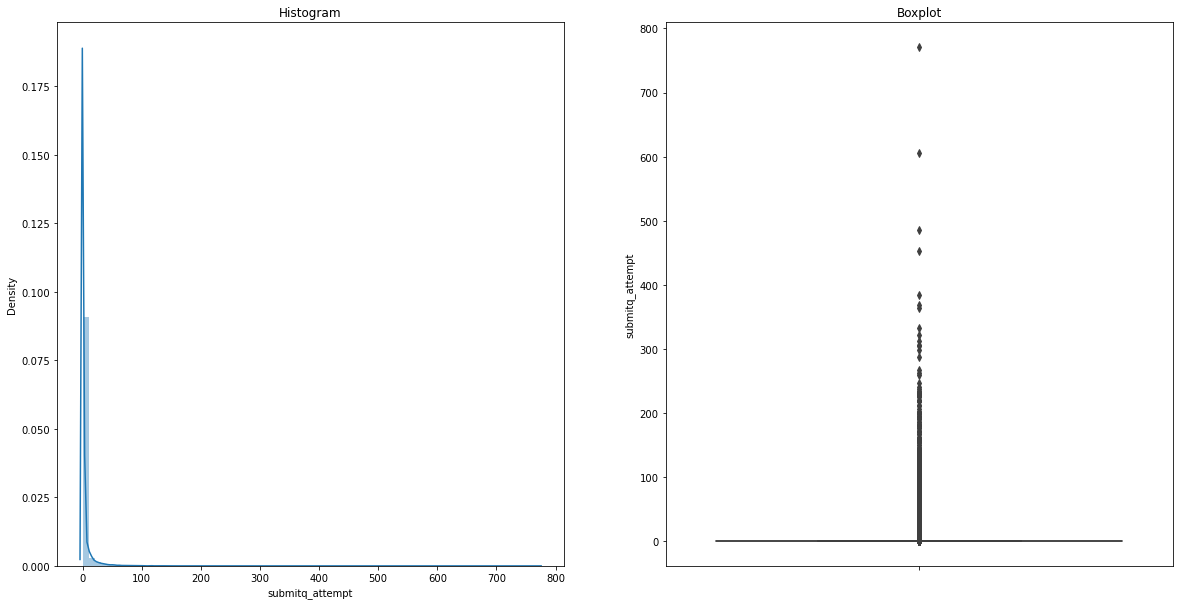

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


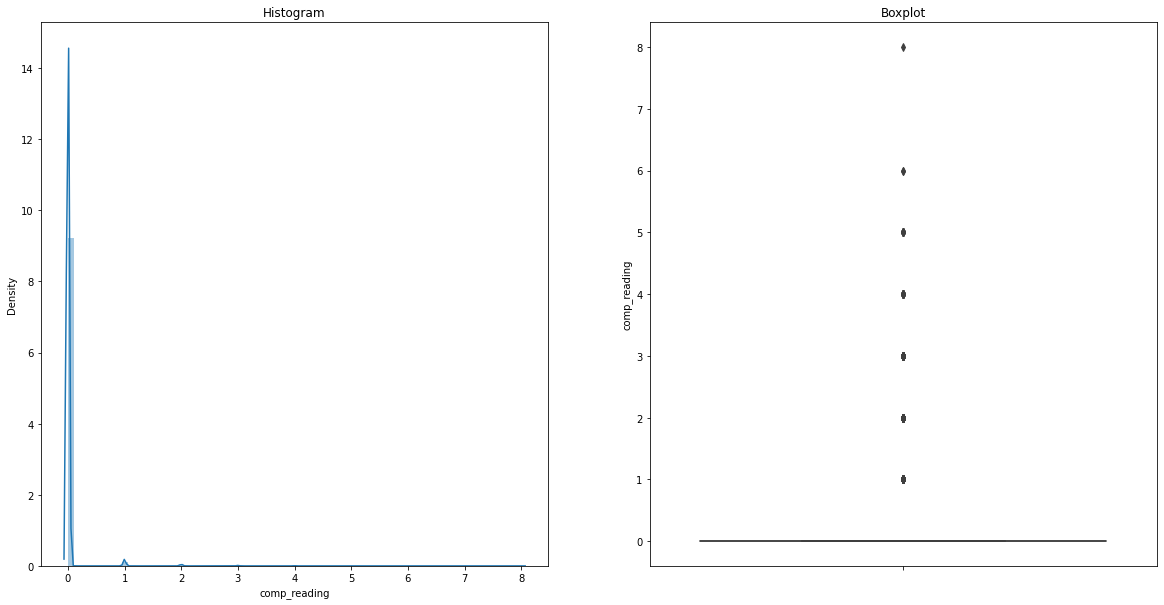

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


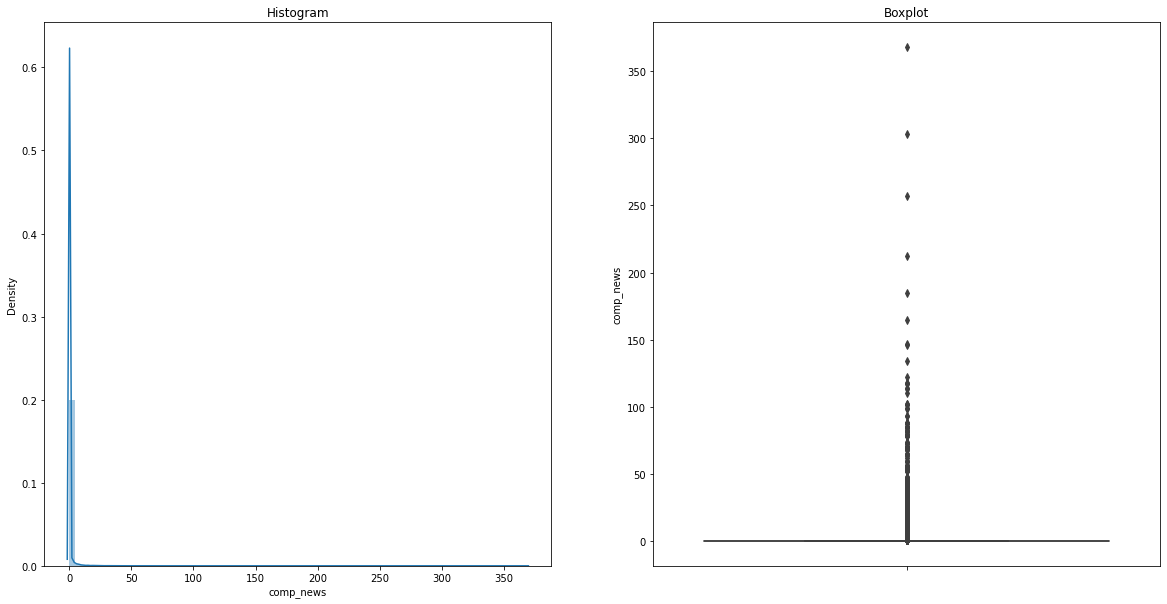

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


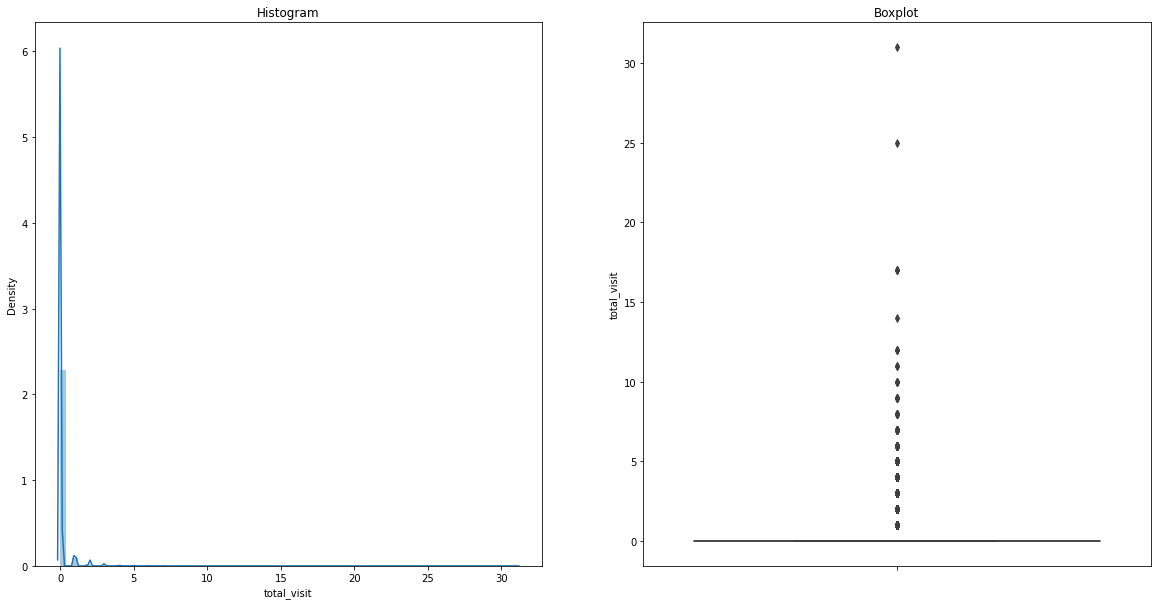

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


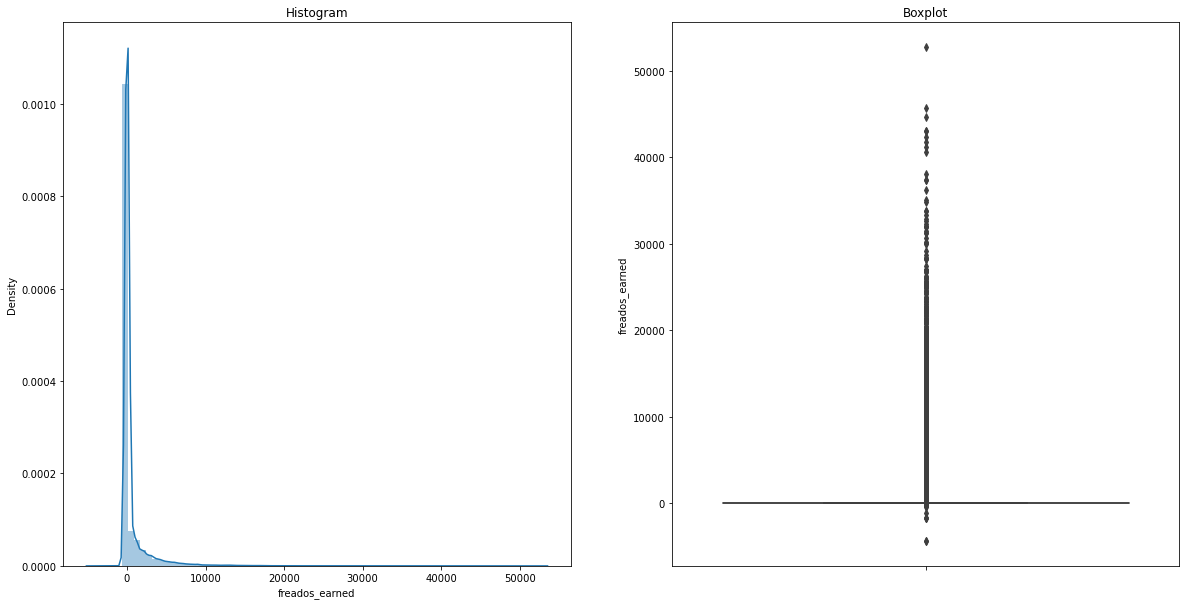

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


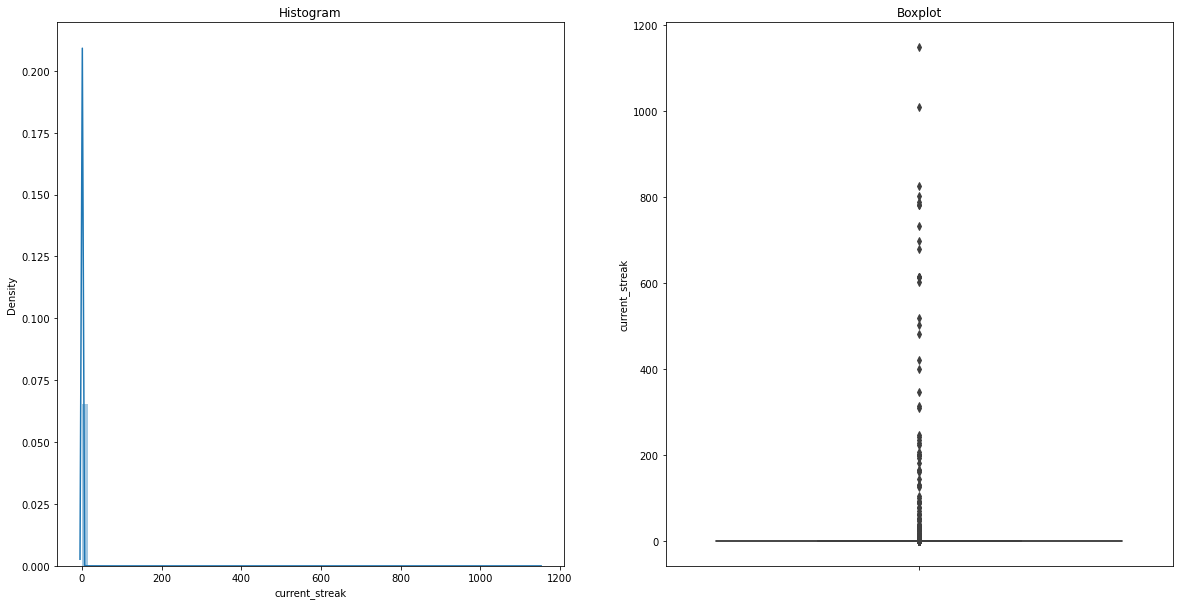

In [15]:
# Outlier treatment
def plots(df,attrib):
    # this function takes two arguments (dataframe and attribute of interest)
    
    # define the figure size
    plt.figure(figsize = (20,10))
    
    # histogram
    plt.subplot(1,2,1)
    sns.distplot(df[attrib],bins = 75)
    plt.title("Histogram")
    
    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y = df[attrib])
    plt.title("Boxplot")
    plt.show()
    
plots(df,"gap_convdate_appcreated")
plots(df,"days_active_app")
plots(df,"total_timespent_last7D")
plots(df,"submitq_accuracy")
plots(df,"submitq_attempt")
plots(df,"comp_reading")
plots(df,"comp_news")
plots(df,"total_visit")
plots(df,"freados_earned")
plots(df,"current_streak")

In [16]:
# Observations
# All the three attributes visualized above have skewed distribution, therefore the right method to remove the
# Outliers is IQR proximity measure.
# Upper_limit = (75th percentile)+(1.5 * IQR), Where IQR is the inter quartile range.
# Lower_limit = (25th percentile)-(1.5 * IQR)

In [17]:
#Checking for skewness
#skenewss - 0.5 to +0.5: symmetric
#-1 to -0.5: moderately skewed
#+0.5 to +1: moderately skewed
# less than 1 or greater than 1: highly skewed
print("The skewness of gap_convdate_appcreated is ",df['gap_convdate_appcreated'].skew())
print("The skewness of freados_earned is ",df['freados_earned'].skew())
print("The skewness of current_streak is ",df['current_streak'].skew())
print("The skewness of days_active_app is ",df['days_active_app'].skew())
print("The skewness of submitq_accuracy is ",df['submitq_accuracy'].skew())
print("The skewness of submitq_attempt is ",df['submitq_attempt'].skew())
print("The skewness of comp_reading is ",df['comp_reading'].skew())
print("The skewness of comp_news is ",df['comp_news'].skew())
print("The skewness of total_visit is ",df['total_visit'].skew())
print("The skewness of total_timespent_last7D is ",df['total_timespent_last7D'].skew())

The skewness of gap_convdate_appcreated is  1.7738837682054598
The skewness of freados_earned is  6.99864255265228
The skewness of current_streak is  49.89042089849504
The skewness of days_active_app is  13.168056390397364
The skewness of submitq_accuracy is  2.4336398168708135
The skewness of submitq_attempt is  14.854902530409731
The skewness of comp_reading is  13.83853717776854
The skewness of comp_news is  30.940091101841038
The skewness of total_visit is  14.825888335801995
The skewness of total_timespent_last7D is  4.29917970177239


Replacing outliers with median 

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


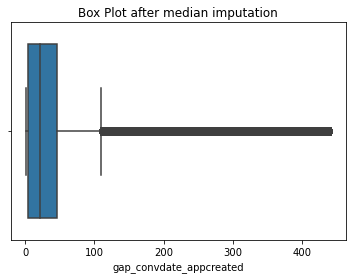

In [18]:
q1 = df['gap_convdate_appcreated'].quantile(0.25)
q3 = df['gap_convdate_appcreated'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['gap_convdate_appcreated'])
for i in df['gap_convdate_appcreated']:
    if i > Upper_tail or i < Lower_tail:
            df['gap_convdate_appcreated'] = df['gap_convdate_appcreated'].replace(i, m)
sns.boxplot(df['gap_convdate_appcreated'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


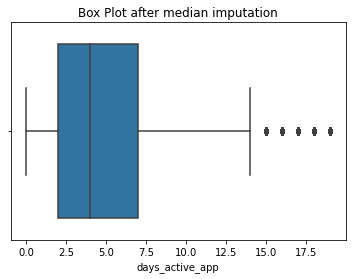

In [19]:
q1 = df['days_active_app'].quantile(0.25)
q3 = df['days_active_app'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['days_active_app'])
for i in df['days_active_app']:
    if i > Upper_tail or i < Lower_tail:
            df['days_active_app'] = df['days_active_app'].replace(i, m)
sns.boxplot(df['days_active_app'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


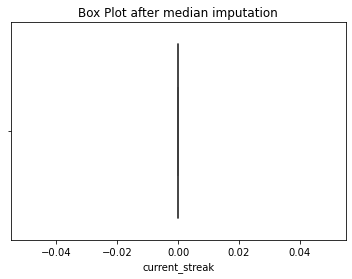

In [20]:
q1 = df['current_streak'].quantile(0.25)
q3 = df['current_streak'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['current_streak'])
for i in df['current_streak']:
    if i > Upper_tail or i < Lower_tail:
            df['current_streak'] = df['current_streak'].replace(i, m)
sns.boxplot(df['current_streak'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


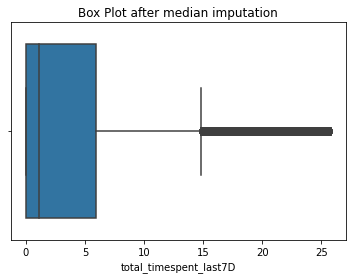

In [21]:
q1 = df['total_timespent_last7D'].quantile(0.25)
q3 = df['total_timespent_last7D'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['total_timespent_last7D'])
for i in df['total_timespent_last7D']:
    if i > Upper_tail or i < Lower_tail:
            df['total_timespent_last7D'] = df['total_timespent_last7D'].replace(i, m)
sns.boxplot(df['total_timespent_last7D'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


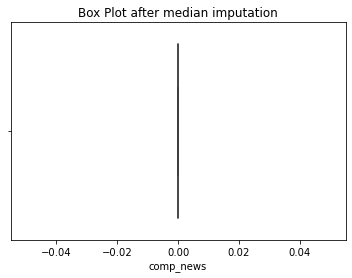

In [22]:
q1 = df['comp_news'].quantile(0.25)
q3 = df['comp_news'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['comp_news'])
for i in df['comp_news']:
    if i > Upper_tail or i < Lower_tail:
            df['comp_news'] = df['comp_news'].replace(i, m)
sns.boxplot(df['comp_news'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


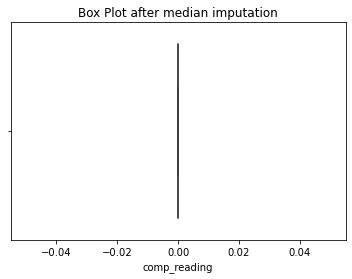

In [23]:
q1 = df['comp_reading'].quantile(0.25)
q3 = df['comp_reading'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['comp_reading'])
for i in df['comp_reading']:
    if i > Upper_tail or i < Lower_tail:
            df['comp_reading'] = df['comp_reading'].replace(i, m)
sns.boxplot(df['comp_reading'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


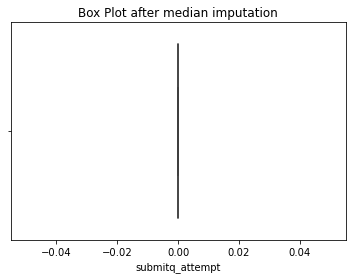

In [24]:
q1 = df['submitq_attempt'].quantile(0.25)
q3 = df['submitq_attempt'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['submitq_attempt'])
for i in df['submitq_attempt']:
    if i > Upper_tail or i < Lower_tail:
            df['submitq_attempt'] = df['submitq_attempt'].replace(i, m)
sns.boxplot(df['submitq_attempt'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


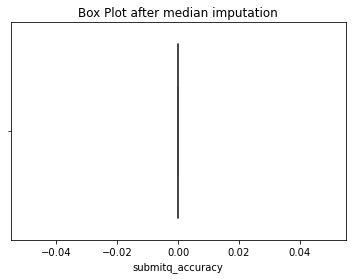

In [25]:
q1 = df['submitq_accuracy'].quantile(0.25)
q3 = df['submitq_accuracy'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['submitq_accuracy'])
for i in df['submitq_accuracy']:
    if i > Upper_tail or i < Lower_tail:
            df['submitq_accuracy'] = df['submitq_accuracy'].replace(i, m)
sns.boxplot(df['submitq_accuracy'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


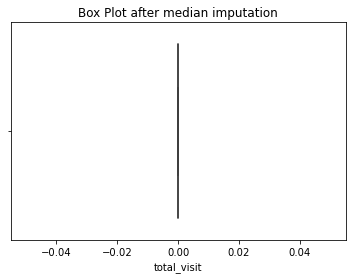

In [26]:
q1 = df['total_visit'].quantile(0.25)
q3 = df['total_visit'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['total_visit'])
for i in df['total_visit']:
    if i > Upper_tail or i < Lower_tail:
            df['total_visit'] = df['total_visit'].replace(i, m)
sns.boxplot(df['total_visit'])
plt.title("Box Plot after median imputation")
plt.show()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


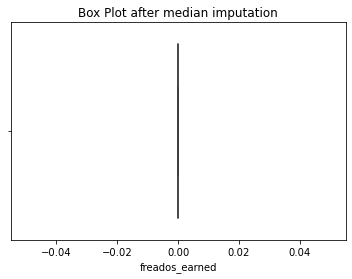

In [27]:
q1 = df['freados_earned'].quantile(0.25)
q3 = df['freados_earned'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.median(df['freados_earned'])
for i in df['freados_earned']:
    if i > Upper_tail or i < Lower_tail:
            df['freados_earned'] = df['freados_earned'].replace(i, m)
sns.boxplot(df['freados_earned'])
plt.title("Box Plot after median imputation")
plt.show()

In [28]:
print("The skewness of gap_convdate_appcreated is ",df['gap_convdate_appcreated'].skew())
print("The skewness of freados_earned is ",df['freados_earned'].skew())
print("The skewness of current_streak is ",df['current_streak'].skew())
print("The skewness of days_active_app is ",df['days_active_app'].skew())
print("The skewness of submitq_accuracy is ",df['submitq_accuracy'].skew())
print("The skewness of submitq_attempt is ",df['submitq_attempt'].skew())
print("The skewness of comp_reading is ",df['comp_reading'].skew())
print("The skewness of comp_news is ",df['comp_news'].skew())
print("The skewness of total_visit is ",df['total_visit'].skew())
print("The skewness of total_timespent_last7D is ",df['total_timespent_last7D'].skew())

The skewness of gap_convdate_appcreated is  2.5769341851718894
The skewness of freados_earned is  0
The skewness of current_streak is  0
The skewness of days_active_app is  1.2562415263360722
The skewness of submitq_accuracy is  0
The skewness of submitq_attempt is  0
The skewness of comp_reading is  0
The skewness of comp_news is  0
The skewness of total_visit is  0
The skewness of total_timespent_last7D is  1.6886862929171802


1. our independent variables after removing multicollinearity are the above variables and conversion_outcome2.

In [29]:
df.conversion_outcome1.value_counts()

0    44974
1     8086
Name: conversion_outcome1, dtype: int64

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    44974
1     8086
Name: conversion_outcome1, dtype: int64


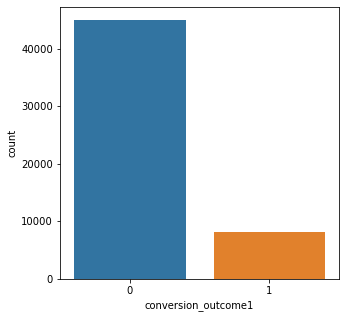

In [30]:
# Checking for class imbalance problem
plt.figure(figsize=(5,5))
sns.countplot(df["conversion_outcome1"])
print(df["conversion_outcome1"].value_counts())
sns.set_palette("Set2")

Out of 53060 users, around 6.56% are non subscribers and there are 36888 instances less in the class label "0" than in class label "1". So, imbalance is shown here and hence needs to be treated.

In [31]:
# Feature scaling

# Importing the library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('conversion_outcome1', axis='columns'))
Y = df['conversion_outcome1']

### Splitting the data into train and test

In [32]:
# Importing the library
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [33]:
# Splitting the dataset in train and test in the ratio (70:30) 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=100)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (42448, 11)
Testing split input-  (10612, 11)


In [34]:
print(X.shape,X_train.shape, Y.shape, Y_train.shape)

(53060, 11) (42448, 11) (53060,) (42448,)


Counter({0: 9900, 1: 100})


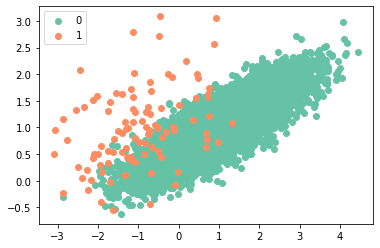

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [36]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

Before OverSampling, counts of label '1': 6466
Before OverSampling, counts of label '0': 35982 

After OverSampling, the shape of train_X: (71964, 11)
After OverSampling, the shape of train_Y: (71964,) 

After OverSampling, counts of label '1': 35982
After OverSampling, counts of label '0': 35982


In [38]:
# Converting into Dataframe
Ytest = pd.DataFrame(Y_test)
Ytest.head()

,conversion_outcome1
35900,0
26563,0
21555,0
8087,0
23764,0


In [39]:
Ytrain = pd.DataFrame(Y_train)
Ytrain.head()

,conversion_outcome1
22433,0
14272,0
21784,1
15376,0
12952,0


### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object First
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


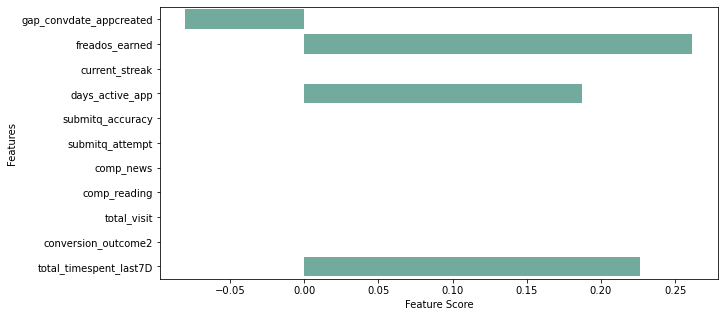

In [41]:
from matplotlib import pyplot
importance2 = lr.coef_[0]

plt.figure(figsize=(10,5))
# plot feature importance
sns.barplot(importance2, ['gap_convdate_appcreated','freados_earned','current_streak','days_active_app','submitq_accuracy','submitq_attempt','comp_news','comp_reading','total_visit','conversion_outcome2','total_timespent_last7D'],  color='#69b3a2')
    
pyplot.xlabel('Feature Score')
pyplot.ylabel('Features')
pyplot.show()


In [42]:
lr.coef_

array([[-0.08033071,  0.26168653,  0.        ,  0.1874396 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.22600915]])

In [43]:
df=df.drop(['current_streak','submitq_attempt','submitq_accuracy','comp_news','comp_reading','total_visit','conversion_outcome2'],axis=1,inplace=True)


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_score,f1_score

Text(0.5, 15.0, 'Predictions')

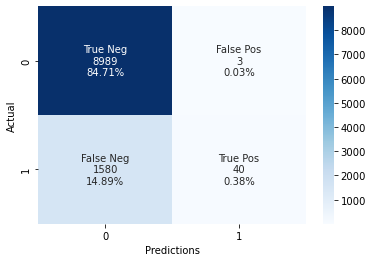

In [45]:
# Confusion matrix
from sklearn import metrics

ypred=lr.predict(X_test)

cm = metrics.confusion_matrix(Y_test, ypred)

# Graphical way

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predictions")

In [46]:
#find the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, ypred)
print("the accuracy value is", accuracy)

from sklearn.metrics import recall_score
recall = recall_score(Y_test, ypred)
print("the value of recall is: ",recall)

from sklearn.metrics import precision_score
precision = precision_score(Y_test, ypred)
print("the precision value is: ",precision)

from sklearn.metrics import f1_score
f1 = f1_score(Y_test, ypred)
print("the f1 value is: ",f1)

print("======================================================")
print(classification_report(Y_test,ypred))

the accuracy value is 0.850829249905767
the value of recall is:  0.024691358024691357
the precision value is:  0.9302325581395349
the f1 value is:  0.0481058328322309
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8992
           1       0.93      0.02      0.05      1620

    accuracy                           0.85     10612
   macro avg       0.89      0.51      0.48     10612
weighted avg       0.86      0.85      0.79     10612



In [47]:

ypred2 = lr.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(Y_train,ypred2))
print("Recall : ",metrics.recall_score(Y_train,ypred2))
print("F1 score : ",metrics.f1_score(Y_train,ypred2))
print("Precision : ",metrics.precision_score(Y_train,ypred2))

Accuracy :  0.8504052016584999
Recall :  0.020878441076399627
F1 score :  0.04078549848942598
Precision :  0.8766233766233766


In [48]:
from sklearn import metrics
ypred = lr.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(Y_test,ypred))
print("Recall : ",metrics.recall_score(Y_test,ypred))
print("F1 score : ",metrics.f1_score(Y_test,ypred))
print("Precision : ",metrics.precision_score(Y_test,ypred))

Accuracy :  0.850829249905767
Recall :  0.024691358024691357
F1 score :  0.0481058328322309
Precision :  0.9302325581395349


c:\Users\Yash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


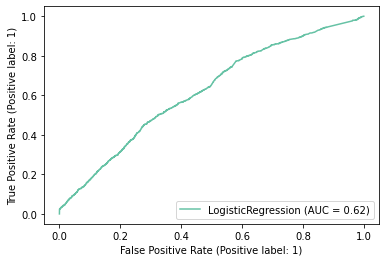

In [49]:
# From sklearn import metrics-ROC curve
metrics.plot_roc_curve(lr, X_test, Y_test)  

plt.show()  

### Random Forest Classifier 

In [50]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Model implementation : RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion= "gini")
# Train
model.fit(X_train,Y_train)
Y_Pred1 = model.predict(X_test)

In [52]:
model_importance = pd.DataFrame(columns=['Variable name', 'Feature Score'])
model_importance['Variable name']=['gap_convdate_appcreated','freados_earned','current_streak','days_active_app','submitq_accuracy','submitq_attempt','comp_news','comp_reading','total_visit','conversion_outcome2','total_timespent_last7D']
imp = model.feature_importances_
model_importance['Feature Score'] = model.feature_importances_
model_importance.sort_values(["Feature Score"], axis=0,ascending=False)

,Variable name,Feature Score
3,days_active_app,0.552277
0,gap_convdate_appcreated,0.309468
1,freados_earned,0.115197
10,total_timespent_last7D,0.023058
2,current_streak,0.000000
4,submitq_accuracy,0.000000
5,submitq_attempt,0.000000
6,comp_news,0.000000
7,comp_reading,0.000000
8,total_visit,0.000000


c:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


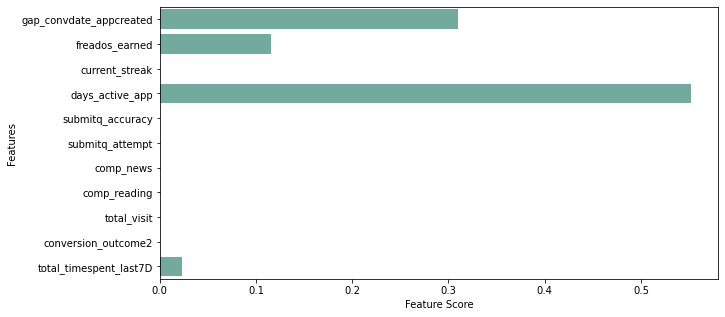

In [53]:
from matplotlib import pyplot
# plot feature importance

plt.figure(figsize=(10,5))
# plot feature importance
sns.barplot(imp, ['gap_convdate_appcreated','freados_earned','current_streak','days_active_app','submitq_accuracy','submitq_attempt','comp_news','comp_reading','total_visit','conversion_outcome2','total_timespent_last7D'],  color='#69b3a2')

pyplot.xlabel('Feature Score')
pyplot.ylabel('Features')
pyplot.show()




Text(0.5, 15.0, 'Predictions')

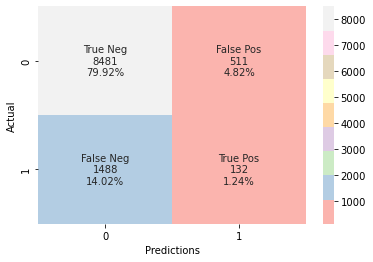

In [54]:
#confusion matrix
from sklearn import metrics

Y_Pred1=model.predict(X_test)

cm = confusion_matrix(Y_test, Y_Pred1)

#graphical way

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1')
plt.ylabel("Actual")
plt.xlabel("Predictions")

In [55]:
accuracy = accuracy_score(Y_test, Y_Pred1)
print("the accuracy value is", accuracy)

recall = recall_score(Y_test, Y_Pred1)
print("the value of recall is: ",recall)

precision = precision_score(Y_test, Y_Pred1)
print("the precision value is: ",precision)

f1 = f1_score(Y_test, Y_Pred1)
print("the f1 value is: ",f1)

print("===========================================================")

# Model evaluation
print(classification_report(Y_test,Y_Pred1))

the accuracy value is 0.8116283452695062
the value of recall is:  0.08148148148148149
the precision value is:  0.2052877138413686
the f1 value is:  0.11665930181175432
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8992
           1       0.21      0.08      0.12      1620

    accuracy                           0.81     10612
   macro avg       0.53      0.51      0.51     10612
weighted avg       0.75      0.81      0.78     10612



In [56]:
from sklearn import metrics
ypred = model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(Y_test,ypred))
print("Recall : ",metrics.recall_score(Y_test,ypred))
print("F1 score : ",metrics.f1_score(Y_test,ypred))
print("Precision : ",metrics.precision_score(Y_test,ypred))

Accuracy :  0.8116283452695062
Recall :  0.08148148148148149
F1 score :  0.11665930181175432
Precision :  0.2052877138413686


In [57]:
ypred2 = model.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(Y_train,ypred2))
print("Recall : ",metrics.recall_score(Y_train,ypred2))
print("F1 score : ",metrics.f1_score(Y_train,ypred2))
print("Precision : ",metrics.precision_score(Y_train,ypred2))



Accuracy :  0.9221871466264606
Recall :  0.529075162387875
F1 score :  0.674420896993593
Precision :  0.9298722478934494


c:\Users\Yash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


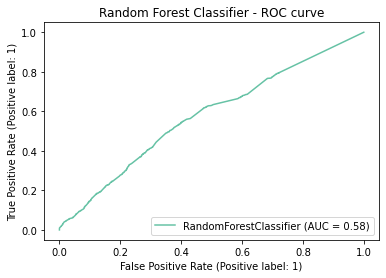

In [58]:
#from sklearn import metrics-ROC curve
metrics.plot_roc_curve(model, X_test, Y_test)  
plt.title("Random Forest Classifier - ROC curve")
plt.show()  

In [59]:
test_df=pd.read_csv('https://raw.githubusercontent.com/yashXmehra/Data-Analytics/main/testdata.csv')

In [60]:
test_df.fillna(method='pad', inplace=True)

In [69]:
submission_df = pd.Series({"id":ypred})

In [71]:
submission_df.to_csv("submission.csv")

In [63]:



submission_df.head()



id         0       0023bac7-a5b5-4582-8552-e3b8a798f4fe
1...
outcome    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
dtype: object

In [ ]:
test_df.shape

(2509, 20)

In [ ]:
test_df.head()

,id,gap_convdate_appcreated,days_active_app,utm_source,device_model,Android_app_version,device_price_cat,grade,current_streak,max_streak,total_timespent_last7D,comp_activity,comp_news,comp_reading,submitq_attempt,submitq_accuracy,total_navigations,total_visit,freados_earned,user_category
0,0023bac7-a5b5-4582-8552-e3b8a798f4fe,3,2,Club1BR,SM-N980F,5.7.1.6,High,Grade 3,0,0,20.000000,0,0,0,0,0.0,3,1,0,332019
1,002abb82-c2c0-4475-81a5-bf9154414ec7,2,2,Club1BR,SM-J810G,5.7.1.6,Medium,Grade 4,0,1,22.983333,0,0,0,0,0.0,35,0,0,xrgoup
2,003025a4-90d0-40ae-a0e3-b4cd3413e003,2,4,Club1BR,1920,5.7.1.6,Medium,Grade 6,0,0,14.800000,0,0,0,0,0.0,24,0,0,rquvwc
3,00502572-c139-4223-953f-bcdcc701c526,124,1,Organic,SM-A505F,5.7.1.6,Medium,Grade 2,0,1,10.733333,0,0,0,0,0.0,12,0,1000,NaN
4,0060afb2-eb79-49b5-a135-6377f01fbc7a,12,2,Organic,ONEPLUS A6010,5.7.1.6,High,Grade 4,0,1,3.183333,0,0,0,0,0.0,1,0,1000,NaN


In [ ]:
ypred = model.predict(X_test)
test_df = pd.Series({"id": test_df["id"],"label": ypred})

In [ ]:

test_df.head(20)



id       0       0023bac7-a5b5-4582-8552-e3b8a798f4fe
1...
label    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
dtype: object

In [ ]:
new_df=X_test

In [ ]:
lr.predict_proba(X_train)

array([[0.88515554, 0.11484446],
       [0.87306579, 0.12693421],
       [0.78170064, 0.21829936],
       ...,
       [0.86676808, 0.13323192],
       [0.8059753 , 0.1940247 ],
       [0.88180811, 0.11819189]])

In [ ]:
from sklearn import metrics
ypred = model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(Y_test,ypred))
print("Recall : ",metrics.recall_score(Y_test,ypred))
print("F1 score : ",metrics.f1_score(Y_test,ypred))
print("Precision : ",metrics.precision_score(Y_test,ypred))

Accuracy :  0.8127591405955522
Recall :  0.07962962962962963
F1 score :  0.11492204899777284
Precision :  0.2064
